## IR1

### Create an original graph

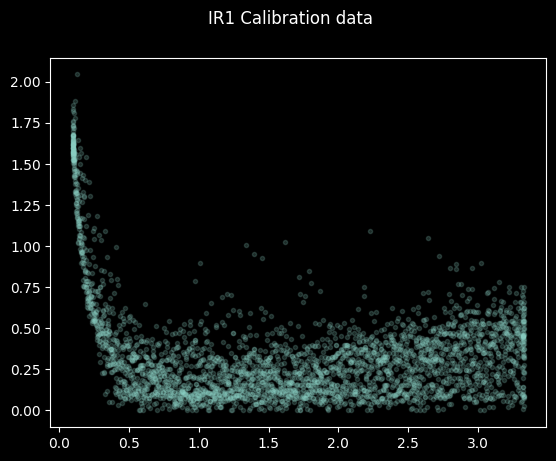

In [1]:


from numpy import loadtxt
from matplotlib.pyplot import subplots, show
# import matplotlib.pyplot as plt

# Load data
filename = 'partA/ir1-calibration.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
distance, raw_ir1 = data.T

# create a graph object
fig, ax = subplots()

fig.suptitle("IR1 Calibration data")

ax.plot(distance,raw_ir1,'.',alpha=0.2)


## Error function


In [2]:
def square_error(index, data_voltage, sim_voltage):
    total_error = 0
    for i in range(index):
        total_error = total_error + (data_voltage[i] - sim_voltage[i]) **2
    return total_error
        

## model

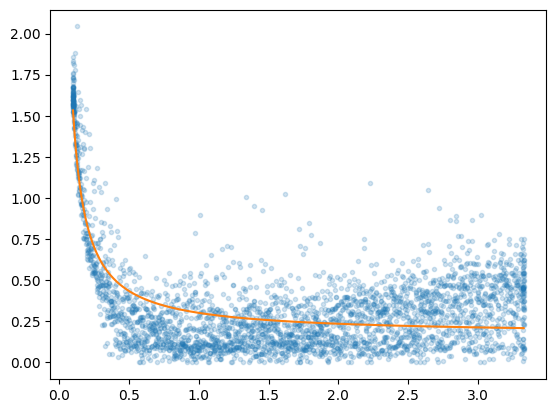

In [3]:
import scipy as sp
matplotlib.style.use('default')  # Graph white background 
def ir1_model(x,a,b):
    return a/x + b

ir1_params, cov = sp.optimize.curve_fit(ir1_model,distance,raw_ir1)
ir1_fit = ir1_model(distance, *ir1_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir1,'.',alpha=0.2)
ax.plot(distance,ir1_fit)

# the error: 
# error_ir1 = square_error(len(ir1_fit),ir1_fit,raw_ir1)
# print(error_ir1)

### Polynomial - THE BEST

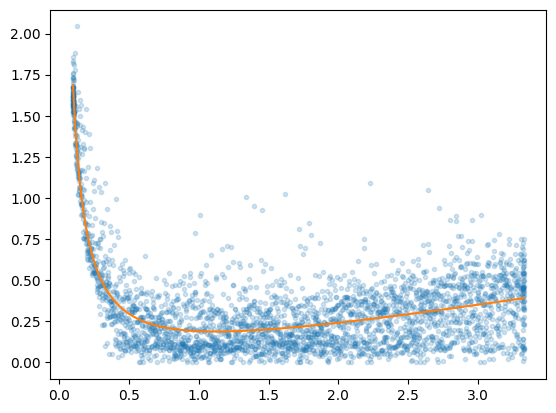

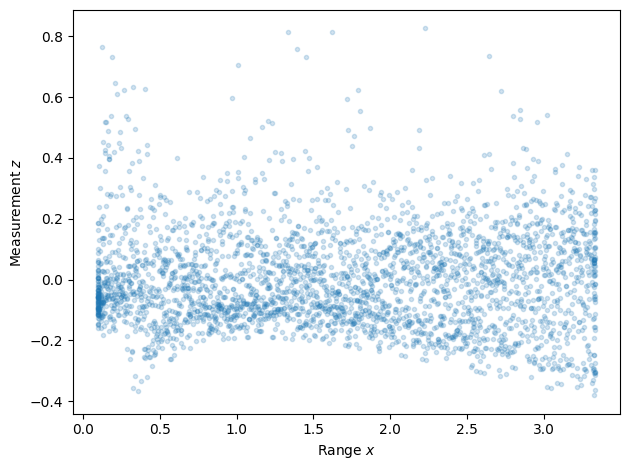

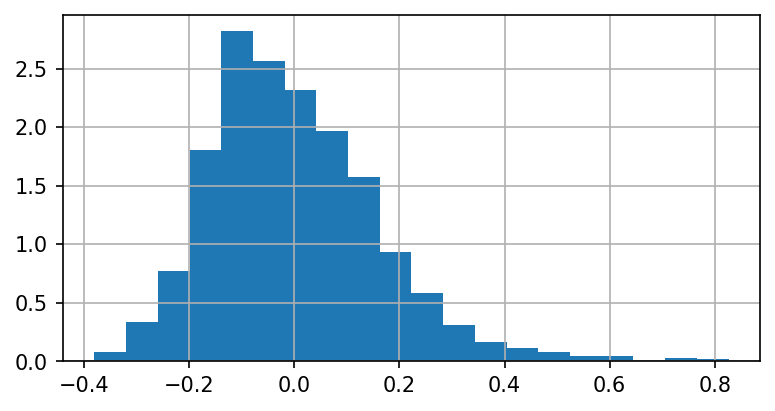

In [4]:
import scipy as sp
import matplotlib.pyplot as plt

# def ir1_polynomial_model(x,a1,a2,b1,b2,c):
#     return (a1*x + b1) / (a2 * x + b2) + c

def ir1_polynomial_model(x,a,b,c):
    return a/x + b*x + c
    # return a/x*2 + b*x +c

ir1_polynomial_params, cov = sp.optimize.curve_fit(ir1_polynomial_model,distance,raw_ir1)
ir1_polynomial_fit = ir1_polynomial_model(distance, *ir1_polynomial_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir1,'.',alpha=0.2)
ax.plot(distance,ir1_polynomial_fit)
# ax.plot(distance,ir1_fit )

# ****************************************************************
# the error: 
residual_ir1_polynomial = raw_ir1 - ir1_polynomial_fit
fig,ax = subplots(1)
ax.plot(distance,residual_ir1_polynomial,'.',alpha=0.2)
# Add labels with LaTeX-style notation
ax.set_xlabel(r"Range $x$")
ax.set_ylabel(r"Measurement $z$")

# import matplotlib.pyplot as plt
plt.tight_layout()

plt.figure(figsize=(6, 3), dpi=150)
plt.hist(residual_ir1_polynomial, bins=20, density=True)
plt.grid()

***


##### test


TypeError: 'module' object is not subscriptable

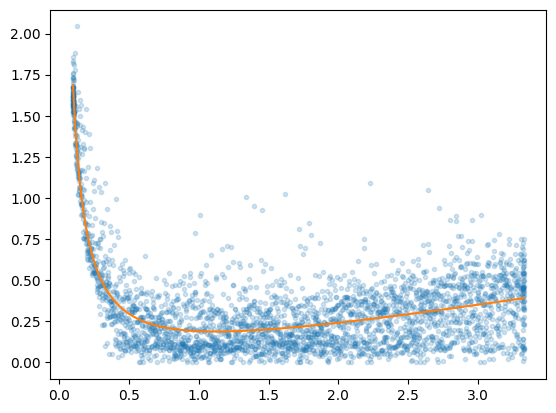

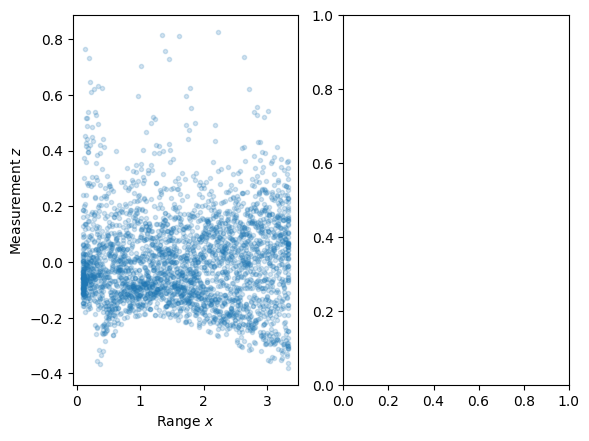

In [5]:
import scipy as sp
# import matplotlib as plt
# ************************** IR1 Model *********************************
# def ir1_polynomial_model(x,a1,a2,b1,b2):
    # return (a1*x + b1) / (a2 * x + b2)


def ir1_polynomial_model(x,a,b,c):
    return a/x*2 + b*x +c

# ************************** The Model *********************************
ir1_polynomial_params, cov = sp.optimize.curve_fit(ir1_polynomial_model,distance,raw_ir1)
ir1_polynomial_fit = ir1_polynomial_model(distance, *ir1_polynomial_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir1,'.',alpha=0.2)
ax.plot(distance,ir1_polynomial_fit)

# ************************** ERROR *********************************
# the error: 
residual_ir1_polynomial = raw_ir1 - ir1_polynomial_fit
fig,ax = subplots(1,2)
# fig,ax = subplots(1,2,figsize=(12, 5))
ax[0].plot(distance,residual_ir1_polynomial,'.',alpha=0.2)
# Add labels with LaTeX-style notation
ax[0].set_xlabel(r"Range $x$")
ax[0].set_ylabel(r"Measurement $z$")

# ************************** HISTOGRAPH *********************************
plt[1].tight_layout()

plt[1].figure(figsize=(6, 3), dpi=150)
plt[1].hist(residual_ir1_polynomial, bins=20, density=True)
plt[1].grid()

### BEST

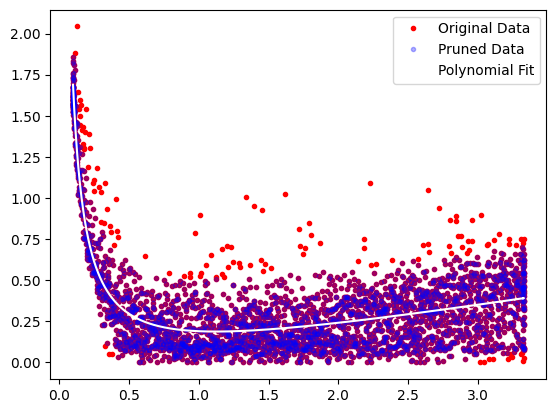

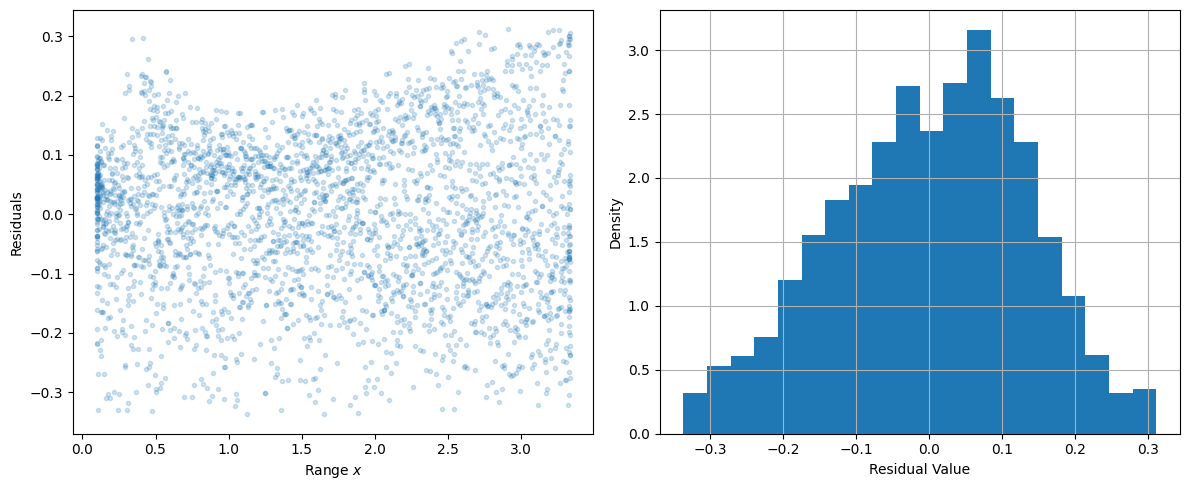

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt  # Import the necessary module



# Fit the polynomial model to the data
ir1_polynomial_params, cov = sp.optimize.curve_fit(ir1_polynomial_model, distance, raw_ir1)
ir1_polynomial_fit = ir1_polynomial_model(distance, *ir1_polynomial_params)


### ********************************* Outliers ********************************************
# Calculate the residuals
residual_ir1_polynomial = raw_ir1 - ir1_polynomial_fit
mask = abs(residual_ir1_polynomial) < np.std(residual_ir1_polynomial) * 2
pruned_ir1 = raw_ir1[mask]
pruned_x = distance[mask]

# Create a figure and plot the original data and the polynomial fit
fig, ax = plt.subplots(1)
ax.plot(distance, raw_ir1, '.', alpha=1,color = 'red', label='Original Data')
ax.plot(pruned_x,pruned_ir1,'.',color = 'blue', alpha=0.3, label='Pruned Data')
ax.plot(distance, ir1_polynomial_fit, color = 'white', label='Polynomial Fit')
ax.legend()  # Add a legend


### ********************************* remove Outliers ********************************************
ir1_pruned_params, cov = sp.optimize.curve_fit(ir1_polynomial_model, pruned_x, pruned_ir1)
ir1_pruned_fit = ir1_polynomial_model(pruned_x, *ir1_pruned_params)
residual_without_Outlier_ir1 = ir1_pruned_fit - pruned_ir1

# *********************** .  ***********************
# Create subplots for residual analysis
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Specify figsize

# Plot the residuals
ax[0].plot(pruned_x, residual_without_Outlier_ir1, '.', alpha=0.2)
ax[0].set_xlabel(r"Range $x$")
ax[0].set_ylabel(r"Residuals")

# Create a histogram of the residuals
ax[1].hist(residual_without_Outlier_ir1, bins=20, density=True)
ax[1].set_xlabel("Residual Value")
ax[1].set_ylabel("Density")
ax[1].grid()

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots


## Piecewise Function

In [6]:
import scipy as sp
import numpy as np

Error_Array = []

for AA in distance:
    def ir1_piecewise_model(x, a1, b1, a2, b2):
        Xb =  AA
        res = np.zeros_like(x)
        res[x < Xb] = a1 / x[x < Xb] + b1
        res[x >= Xb] = a2 * x[x >= Xb] + b2
        return res
    ir1_params, cov = sp.optimize.curve_fit(ir1_piecewise_model,distance,raw_ir1)
    ir1_fit_pw = ir1_piecewise_model(distance, *ir1_params)
    Error_Array.append(square_error(len(raw_ir1),raw_ir1,ir1_fit_pw))


# ****************************************************************
# the error: 
# Error_Array.append(square_error(len(ir1_fit),ir1_fit,ir1_fit_pw))

# print(Error_Array)
print(len(Error_Array))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


3022


In [7]:
print(min(Error_Array))

min_Error = min(Error_Array)
min_index = Error_Array.index(min_Error)
min_distance = distance[min_index]
print(min_index)
print(distance[min_index])

79.04780566088067
832
0.885


In [8]:
# print(Error_Array)


79.04780566088067


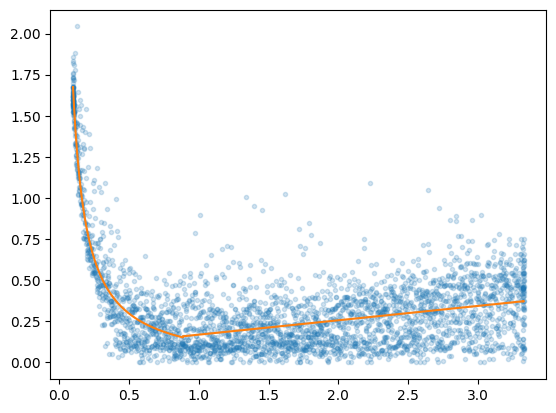

In [9]:
import scipy as sp

def ir1_piecewise_model(x,a1,b1,a2,b2):
    Xb =  min_distance
    res = np.zeros_like(x)
    res[x < Xb] = a1 / x[x < Xb] + b1
    res[x >= Xb] = a2 * x[x >= Xb] + b2
    
    return res

ir1_params, cov = sp.optimize.curve_fit(ir1_piecewise_model,distance,raw_ir1)
ir1_fit_pw = ir1_piecewise_model(distance, *ir1_params)

fig,ax = subplots(1)
ax.plot(distance,raw_ir1,'.',alpha=0.2)
ax.plot(distance,ir1_fit_pw)

# ****************************************************************
# the error: 
error_ir1_pw = square_error(len(raw_ir1),raw_ir1,ir1_fit_pw)
print(error_ir1_pw)


# Residual


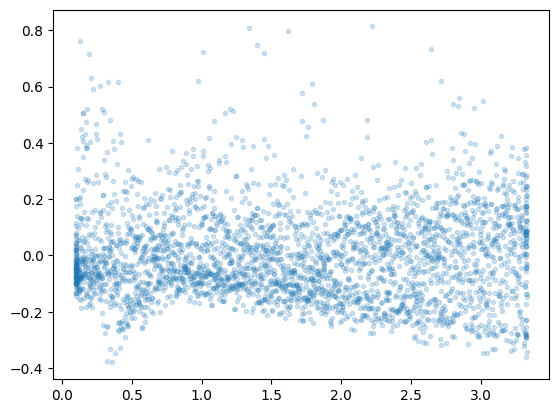

In [10]:
residual_pw = raw_ir1 - ir1_fit_pw
fig,ax = subplots(1)
ax.plot(distance,residual_pw,'.',alpha=0.2)


<Figure size 640x480 with 0 Axes>

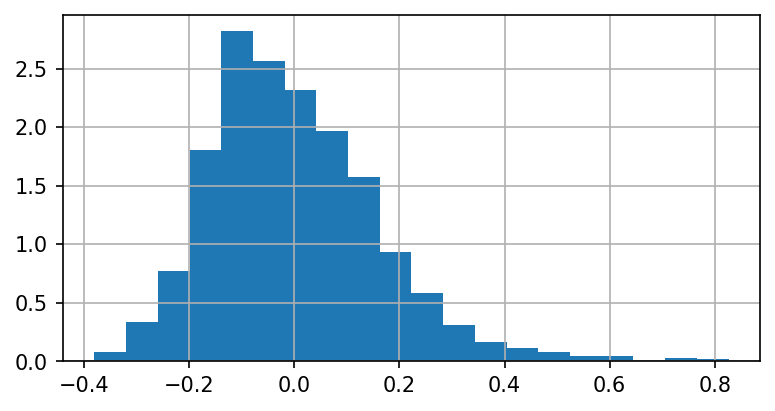

In [11]:
import matplotlib.pyplot as plt
plt.tight_layout()

plt.figure(figsize=(6, 3), dpi=150)
plt.hist(residual_ir1_polynomial, bins=20, density=True)
plt.grid()